`data/englishonset` 데이터를 학습합시다.

In [51]:
from os.path import join
from phoncon.corpus import LearningData, slice_word, randomize_word
from phoncon.features import FeatureSystem

DATA_PATH = "./data"
LEARNING_DATA = join(DATA_PATH, "englishonset/EnglishLearningData.txt")
FEATURES = join(DATA_PATH, "englishonset/EnglishFeatures.txt")

ld = LearningData(LEARNING_DATA, prefix="# ")
fs = FeatureSystem.load(FEATURES) \
    .add_word_boundary("#", "word_boundary") \
    .to_binary_feature()

In [32]:
N = 1000
well_formed = ld.sample(N)
ill_formed = randomize_word(ld.sample(N), fs.get_phonemes())

In [33]:
wf_sliced = list(slice_word(well_formed, 2))
if_sliced = list(slice_word(ill_formed, 2))

X = fs.get_matrix(wf_sliced + if_sliced)
y = len(wf_sliced) * [1] + len(if_sliced) * [0]

In [53]:
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
)
rfc.fit(X, y)
y_pred = rfc.predict(X)

In [54]:
accuracy_score(y, y_pred)

0.7406957928802589

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 16))

plot_tree(dtc.estimators_[0], feature_names=X.columns, filled=True)
plt.savefig("decision_tree.png")
plt.close()

In [48]:
indice = X.query("`-word_boundary0` == 1 & `+voice1` == 1").index
indice
# [y[i] for i in indice]

Index(['T DH', 'NG G', 'G B', 'S B', 'DH ZH', 'Z B', 'Y JH', 'CH D', 'D V',
       'G G', 'P G', 'D V', 'M G', 'SH V', 'Y ZH', 'DH V', 'D JH', 'NG V',
       'S V', 'D B', 'S B', 'S DH', 'G Z', 'Y Z', 'ZH D', 'D ZH', 'D B',
       'CH V', 'V Z', 'T B', 'SH ZH', 'Z G', 'HH DH', 'V D', 'L D', 'K ZH',
       'W Z', 'G JH', 'D Z', 'S G', 'JH G', 'F D', 'T JH', 'Y B', 'F ZH',
       'NG V', 'V JH', 'V JH', 'T Z', 'S DH', 'ZH JH', 'M JH', 'DH D', 'NG JH',
       'S Z', 'HH JH', 'P DH', 'B B', 'M B', 'L Z', 'G Z', 'R B', 'V ZH',
       'G Z', 'W Z', 'JH DH', 'CH B'],
      dtype='object')

In [49]:
fs._data.query("`+voice` == 1")

,+consonantal,-consonantal,+approximant,-approximant,+sonorant,-sonorant,+continuant,-continuant,+nasal,-nasal,...,+lateral,-lateral,+dorsal,-dorsal,+high,-high,+back,-back,+word_boundary,-word_boundary
B,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
D,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
DH,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
G,1,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
JH,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
V,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Z,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ZH,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
if_sliced

['# ZH',
 '# Z',
 '# N',
 '# B',
 '# T',
 '# K',
 '# P',
 '# T',
 '# N',
 '# T',
 'T F',
 '# NG',
 'NG F',
 '# #',
 '# NG',
 '# ZH',
 '# TH',
 '# F',
 'F HH',
 '# S',
 '# V',
 '# L',
 '# SH',
 '# W',
 '# F',
 '# ZH',
 '# T',
 '# Z',
 '# P',
 '# W',
 '# JH',
 '# T',
 '# NG',
 '# F',
 '# S',
 '# Y',
 '# HH',
 '# G',
 '# NG',
 '# DH',
 '# S',
 '# S',
 '# W',
 '# ZH',
 '# L',
 '# ZH',
 '# P',
 '# F',
 '# F',
 'F T',
 '# #',
 '# NG',
 '# #',
 '# P',
 'P S',
 '# Y',
 '# M',
 '# TH',
 'TH L',
 '# T',
 'T DH',
 '# TH',
 'TH NG',
 '# S',
 'S SH',
 '# L',
 '# B',
 '# NG',
 'NG G',
 '# SH',
 '# S',
 '# W',
 '# G',
 'G B',
 '# N',
 'N S',
 'S B',
 '# N',
 '# Z',
 '# N',
 '# B',
 '# JH',
 '# DH',
 '# TH',
 'TH S',
 '# CH',
 '# B',
 '# P',
 '# TH',
 '# DH',
 'DH ZH',
 '# S',
 '# #',
 '# G',
 '# L',
 '# ZH',
 '# SH',
 '# G',
 '# S',
 '# L',
 'L TH',
 '# DH',
 '# D',
 'D R',
 '# R',
 '# M',
 '# W',
 '# M',
 '# ZH',
 '# SH',
 '# B',
 'B NG',
 '# JH',
 '# JH',
 'JH Y',
 '# N',
 'N L',
 '# Z',
 'Z B',
 '

In [59]:
fs.get_matrix(slice_word(if_sliced, window=2))

ValueError: Length of values (1220) does not match length of index (0)

In [64]:
ld.

In [62]:
rfc.predict_proba(fs.get_matrix(list(slice_word(if_sliced, window=2))))[:,1]

array([0.19740873, 0.25001597, 0.45398126, ..., 0.5971072 , 0.36641791,
       0.54798277])

In [69]:
proba = rfc.predict_proba(
    fs.get_matrix(list(slice_word(ld._data["word"], window=2)))
)[:, 1]

In [91]:
import numpy as np

gamma = 1 / len(fs.get_phonemes())
trans_prob = gamma * proba / (1 - proba)
combined_prob = []

idx = 0
for word in ld._data["word"]:
    length = len(word.split(" "))
    p = 1
    for _ in range(length - 1):
        p *= trans_prob[idx]
        idx += 1
    combined_prob.append(p)

combined_prob = np.array(combined_prob)
combined_prob /= combined_prob.sum()

combined_prob

array([0.05574057, 0.06789028, 0.04940289, 0.04577908, 0.03015208,
       0.05596519, 0.04734866, 0.04222952, 0.04402307, 0.0414051 ,
       0.04926597, 0.02050546, 0.02472835, 0.03139681, 0.02088957,
       0.04286554, 0.02183881, 0.00393729, 0.01452857, 0.01993149,
       0.03195938, 0.00865982, 0.02875382, 0.00989018, 0.0036179 ,
       0.006103  , 0.01074946, 0.00377285, 0.01669007, 0.01028455,
       0.01040063, 0.00570185, 0.00535758, 0.00856346, 0.00684912,
       0.00116111, 0.03271403, 0.00312911, 0.00522791, 0.00332141,
       0.00184085, 0.00134908, 0.01258841, 0.00220267, 0.00598011,
       0.00046359, 0.0033145 , 0.00132559, 0.00494299, 0.00067235,
       0.01497256, 0.00221393, 0.00273738, 0.00193687, 0.00072759])

<Axes: ylabel='freq'>

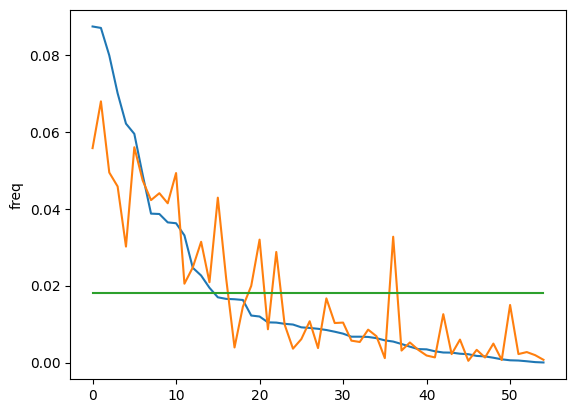

In [92]:
import seaborn as sns

normalized_freq = ld._data["freq"] / sum(ld._data["freq"])

sns.lineplot(normalized_freq)
sns.lineplot(combined_prob)
sns.lineplot([1/len(normalized_freq)] * len(normalized_freq))

In [93]:
sum(normalized_freq)

1.0000000000000004

In [94]:
from scipy.stats import entropy

entropy(normalized_freq, combined_prob)

0.14686117021976886

In [95]:
entropy(normalized_freq, [1 - 0.01 * (len(normalized_freq) - 1)] + [0.01] * (len(normalized_freq)-1))

0.8989982249367174

In [81]:
entropy(normalized_freq, [1/len(normalized_freq)] * len(normalized_freq))

0.635612247217533

In [80]:
entropy(normalized_freq, normalized_freq)

0.0

In [50]:
# -continuant1 == 0, -approximant1 == 0, -voice0 == 1

In [104]:
import pandas as pd
pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False).head(20)

+voice1            0.077899
+continuant1       0.076556
-voice0            0.051364
-anterior1         0.051164
-continuant1       0.048960
+approximant1      0.046621
-voice1            0.046181
+strident1         0.043713
-strident1         0.041048
+sonorant0         0.032143
-approximant1      0.029919
-word_boundary1    0.026101
+coronal1          0.025844
-word_boundary0    0.024759
-continuant0       0.023352
+high1             0.022981
+word_boundary1    0.021631
-sonorant0         0.021479
+word_boundary0    0.019777
+consonantal0      0.019068
dtype: float64

In [5]:
# 데이터 만든다

# 적당히 변환한다 (X, y)
# Decision Tree 돌린다
# 결과를 Visualize 한다.